In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df=pd.read_csv("clean_salary_data.csv")

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company text,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,"Data Scientist II, Product Analytics",$145K-$163K (Glassdoor est.),"The Opportunity\n\n\nAt Livongo, data is at th...",4.5,Livongo\n4.5,"Mountain View, CA","Mountain View, CA",501 to 1000 employees,2014,Company - Public,...,154.0,Livongo\n,CA,1,6,1,0,0,0,1
1,Data Scientist,$145K-$163K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,154.0,ManTech\n,VA,0,52,0,0,0,0,0
2,R&D Scientist,$145K-$163K (Glassdoor est.),"Since 2001, Hygiena has been on a mission to b...",4.0,Hygiena\n4.0,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,154.0,Hygiena\n,DE,0,-1,0,0,0,0,1
3,Data Scientist,$145K-$163K (Glassdoor est.),"HPOne, named CT Magazine's 2018 Great Places t...",3.5,HPOne\n3.5,"Trumbull, CT","Trumbull, CT",501 to 1000 employees,2006,Company - Private,...,154.0,HPOne\n,CT,1,14,1,0,0,0,1
4,"Scientist, Pharmacology",$145K-$163K (Glassdoor est.),Sutro has a unique capability that enables new...,4.3,Sutro Biopharma\n4.3,United States,"South San Francisco, CA",51 to 200 employees,2003,Company - Public,...,154.0,Sutro Biopharma\n,CA,0,17,0,0,0,0,0


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn'],
      dtype='object')

In [28]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [29]:
df['job_simple']= df['Job Title'].apply(title_simplifier)

In [30]:
df.job_simple.value_counts()

data scientist    340
na                339
data engineer     171
analyst            99
director           21
manager            15
mle                15
Name: job_simple, dtype: int64

In [31]:
df['seniority']= df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        653
senior    346
jr          1
Name: seniority, dtype: int64

In [35]:
df.job_state.value_counts()

CA    240
MA    182
VA     99
TX     69
NY     37
NC     34
WA     28
MD     24
NJ     24
TN     22
MI     21
AZ     20
AL     19
OK     19
IN     18
OH     18
IL     16
MO     16
PA     14
DC     11
FL      9
SC      7
CO      6
WI      6
GA      5
UT      5
RI      4
MN      4
CT      4
NH      3
DE      2
KY      2
IA      2
NE      2
KS      1
HI      1
LA      1
OR      1
MS      1
Name: job_state, dtype: int64

In [33]:
df=df[df['job_state']!='Israel']

In [34]:
df=df[df['job_state']!='-1']

In [36]:
# len of job description

df['desc_len'] = df['Job Description'].apply(lambda x:len(x))

df['desc_len'] .head()

0    5127
1    4076
2    3862
3    3571
4    3145
Name: desc_len, dtype: int64

In [37]:
# competitors count

df['num_comp'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x !='-1'  else 0)

In [38]:
df['num_comp']

0      0
1      0
2      2
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    3
Name: num_comp, Length: 997, dtype: int64

In [39]:
df.min_salary

0      145
1      145
2      145
3      145
4      145
      ... 
995     52
996     52
997     52
998     52
999     52
Name: min_salary, Length: 997, dtype: int64

In [43]:
df['company text']=df['company text'].apply(lambda x : x.replace("\n",""))

In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

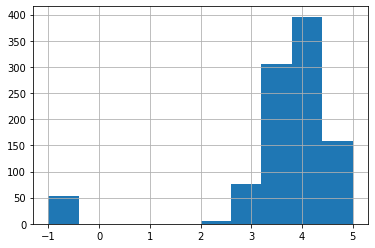

In [45]:
df.Rating.hist()

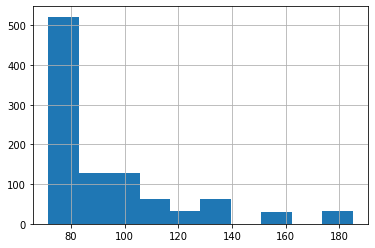

In [47]:
df.avg_salary.hist()

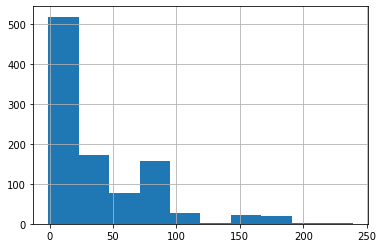

In [48]:
df.age.hist()

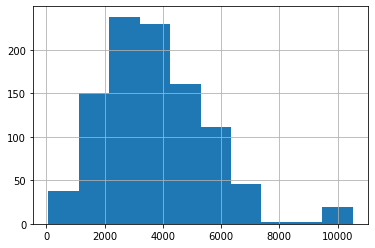

In [49]:
df.desc_len.hist()

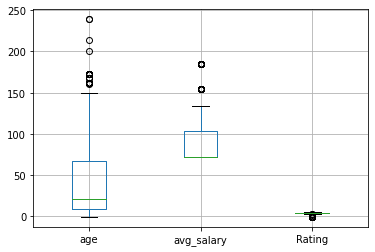

In [52]:
df.boxplot(column=['age','avg_salary','Rating'])

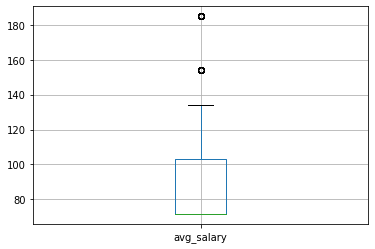

In [53]:
df.boxplot(column=['avg_salary'])

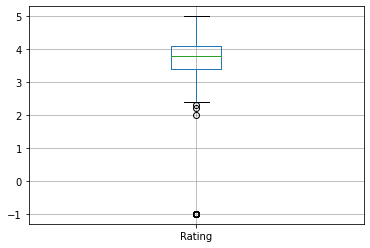

In [54]:
df.boxplot(column=['Rating'])

In [60]:
corr=df[['age','avg_salary','desc_len','Rating','num_comp']].corr()

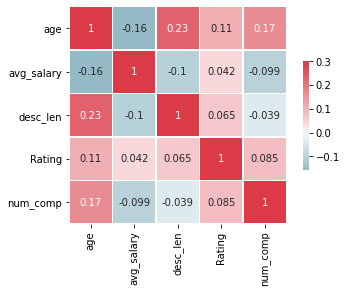

In [61]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [63]:
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector','Revenue','company text', 'job_state','same_state','python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority']]

GRAPH for Location : total =186


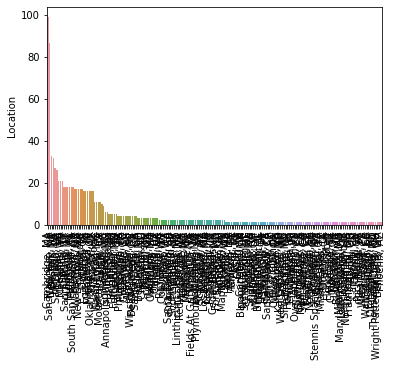

GRAPH for Headquarters : total =201


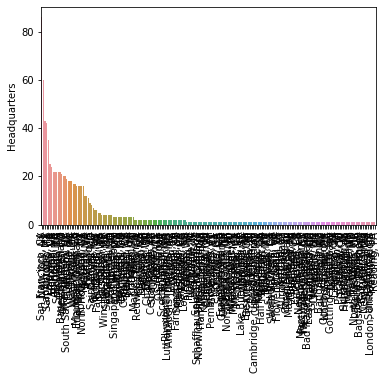

GRAPH for Size : total =9


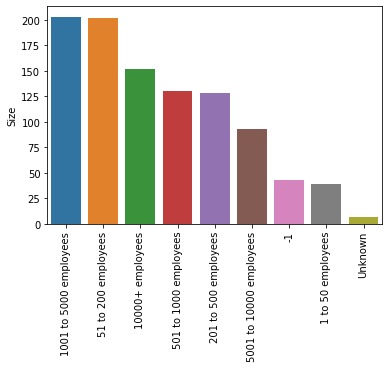

GRAPH for Type of ownership : total =12


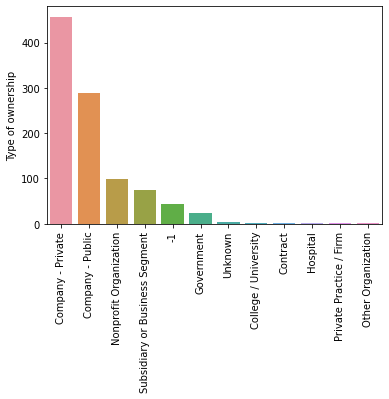

GRAPH for Industry : total =56


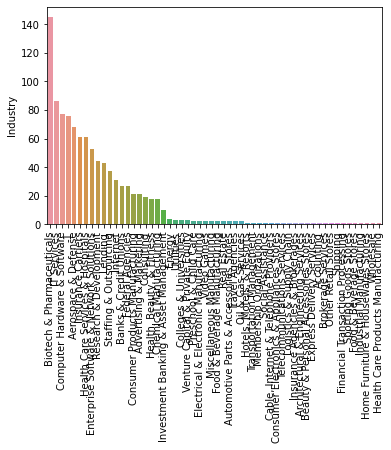

GRAPH for Sector : total =21


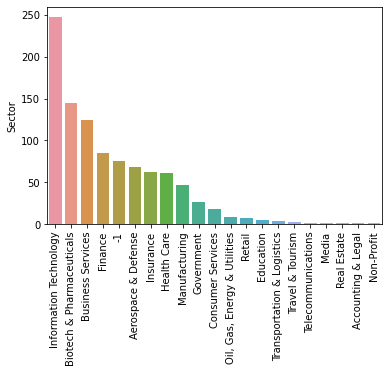

GRAPH for Revenue : total =14


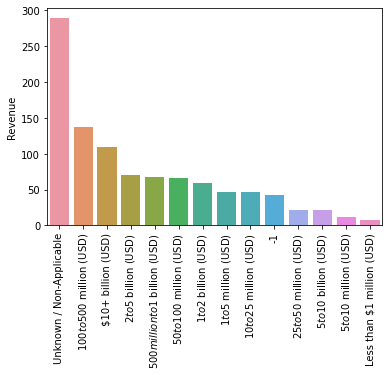

GRAPH for company text : total =339


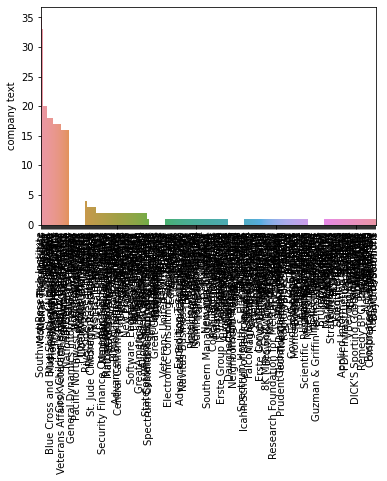

GRAPH for job_state : total =39


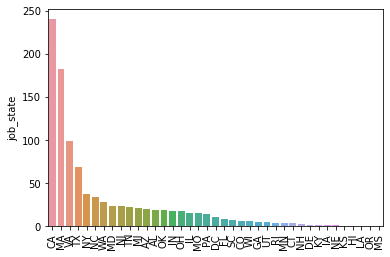

GRAPH for same_state : total =2


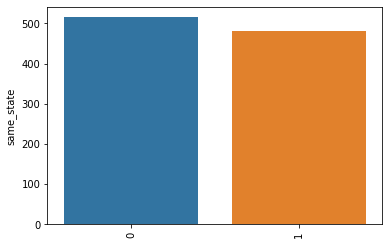

GRAPH for python_yn : total =2


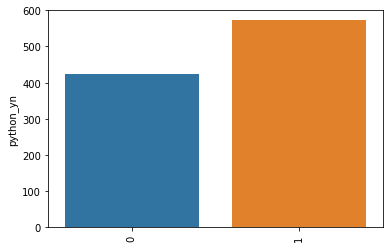

GRAPH for R_yn : total =2


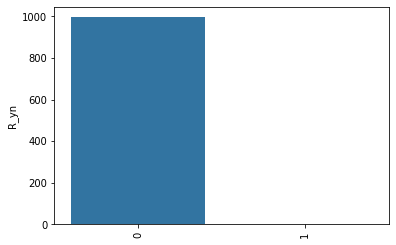

GRAPH for spark_yn : total =2


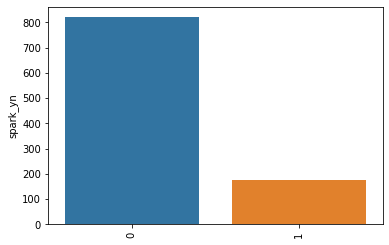

GRAPH for aws_yn : total =2


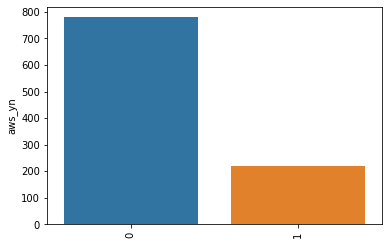

GRAPH for excel_yn : total =2


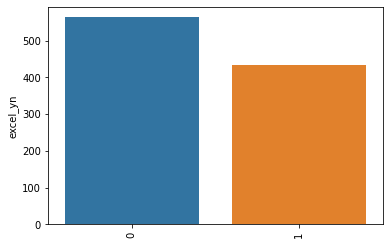

GRAPH for job_simple : total =7


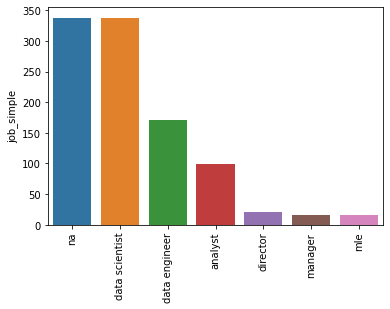

GRAPH for seniority : total =3


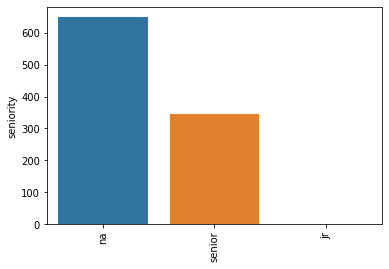

In [68]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("GRAPH for %s : total =%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

GRAPH for Location : total =20


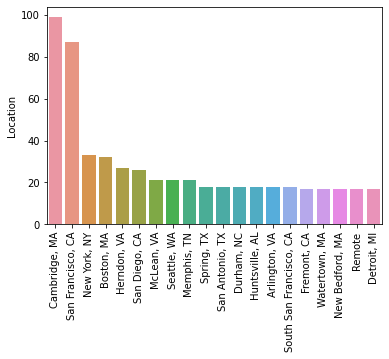

GRAPH for Headquarters : total =20


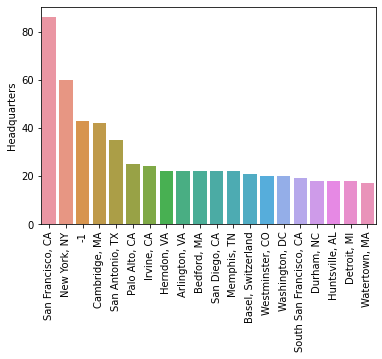

GRAPH for company text : total =20


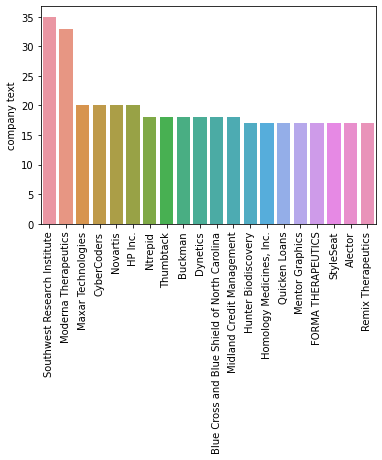

In [70]:
for i in df_cat[['Location', 'Headquarters', 'company text']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print("GRAPH for %s : total =%d"%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [71]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [72]:
pd.pivot_table(df,index='job_simple',values='avg_salary')

,avg_salary
job_simple,
analyst,93.510101
data engineer,84.520468
data scientist,104.943787
director,78.547619
manager,115.533333
mle,110.333333
na,80.630178


In [73]:
pd.pivot_table(df,index=['job_simple','seniority'],values='avg_salary')

avg_salary
job_simple     seniority            
analyst        jr         113.500000
               na          95.118056
               senior      88.288462
data engineer  na          99.375000
               senior      77.286957
data scientist na         106.102941
               senior     100.166667
director       na          75.973684
               senior     103.000000
manager        na         108.928571
               senior     121.312500
mle            na         109.076923
               senior     118.500000
na             na          83.630332
               senior      75.645669

In [79]:
pd.set_option('display.max_rows',None)

In [81]:
pd.pivot_table(df,index=['job_state','job_simple'],values='avg_salary',aggfunc='count').sort_values('job_state',ascending=False)

avg_salary
job_state job_simple                
WI        mle                      2
          data scientist           3
          analyst                  1
WA        na                      16
          data scientist           8
          data engineer            3
          analyst                  1
VA        director                16
          data engineer           21
          data scientist          36
          analyst                  2
          mle                      4
          na                      20
UT        data scientist           4
          data engineer            1
TX        na                      19
          data scientist          25
          data engineer            7
          analyst                 18
TN        na                       2
          data scientist          20
SC        na                       1
          manager                  2
          analyst                  4
RI        data scientist           1
          data engineer            1
          analyst                  1
          director                 1
PA        na                       3
          mle                      2
          data scientist           2
          data engineer            2
          analyst                  5
OR        data scientist           1
OK        data scientist           1
          analyst                  2
          na                      16
OH        na                       7
          mle                      1
          data scientist           8
          data engineer            2
NY        data scientist          21
          analyst                  4
          data engineer            6
          na                       5
          director                 1
NJ        na                      19
          data scientist           4
          analyst                  1
NH        na                       3
NE        na                       1
          analyst                  1
NC        data engineer            1
          na                      23
          manager                  2
          director                 2
          data scientist           6
MS        na                       1
MO        na                       1
          data scientist           9
          data engineer            2
          analyst                  4
MN        na                       1
          data scientist           1
          analyst                  2
MI        manager                  1
          data scientist           3
          data engineer           16
          analyst                  1
MD        data scientist          12
          analyst                  3
          data engineer            5
          mle                      1
          na                       3
MA        na                     114
          manager                  4
          data scientist          60
          data engineer            1
          analyst                  3
LA        analyst                  1
KY        data scientist           2
KS        data scientist           1
IN        na                      16
          data scientist           1
          analyst                  1
IL        data engineer            5
          analyst                  2
          director                 1
          na                       1
          data scientist           7
IA        analyst                  2
HI        data scientist           1
GA        data scientist           5
FL        na                       2
          manager                  1
          data scientist           5
          data engineer            1
DE        na                       1
          data engineer            1
DC        data scientist          11
CT        data scientist           4
CO        mle                      1
          data scientist           4
          data engineer            1
CA        na                      29
          mle                      4
          manager             

In [82]:
pd.pivot_table(df[df['job_simple']=='data scientist'],index=['job_state'],values='avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
job_state,
IL,137.357143
GA,135.100000
MO,122.888889
CO,121.000000
VA,120.138889
MN,120.000000
KS,120.000000
NC,117.166667
NY,115.785714


In [83]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company text', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [99]:
df_pivot=df[['Rating',
      'Size', 
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'min_salary', 'max_salary', 'company text', 
       'same_state', 'age', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'job_simple', 'seniority', 'num_comp','avg_salary']]

In [100]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot, index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
 2.0    185.000000
 2.2    154.000000
 4.3    129.785714
 3.2    125.863636
 4.9    125.000000
 2.4    120.000000
 2.8    116.750000
 4.6    116.400000
 4.5    115.962963
 2.6    114.000000
 2.3    113.500000
 3.1    111.500000
 2.5    110.250000
 5.0    108.214286
 3.0    104.000000
 3.7     98.077778
 2.9     97.451613
 4.4     97.000000
 4.8     94.660714
 4.2     92.656250
 3.4     91.190476
 4.7     90.672414
 3.5     90.373016
 3.6     90.024096
 4.0     89.892857
-1.0     88.888889
 3.3     87.237705
 4.1     87.140351
 2.7     82.454545
 3.8     81.240964
 3.9     80.139535
Size
                         avg_salary
Size                               
Unknown                  114.642857
1 to 50 employees        113.256410
201 to 500 employees     100.824219
501 to 1000 employees     95.792308
51 to 200 employees       92.309406
1001 to 5000 employees    88.721675
10000+ employees          85.305921
5001 to 10000 employees   84.274194
-

avg_salary


ValueError: Grouper for 'avg_salary' not 1-dimensional

In [105]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/gagan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/gagan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

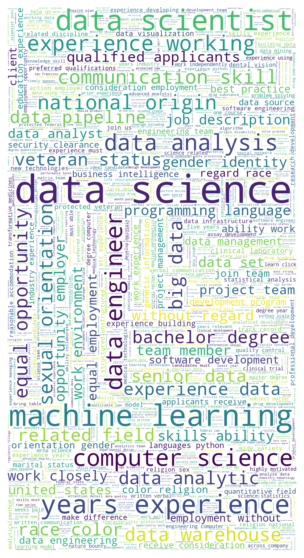

In [107]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()